   OBJECTID   stay_id  temperature  heartrate  resprate  o2sat    sbp   dbp  \
0         1  33258284         98.4       70.0      16.0   97.0  106.0  63.0   
1         2  38112554         98.9       88.0      18.0   97.0  116.0  88.0   
2         3  35968195         99.4      105.0      18.0   96.0  106.0  57.0   
3         4  32952584         97.8       87.0      14.0   97.0   71.0  43.0   
4         5  39399961         98.7       77.0      16.0   98.0   96.0  50.0   

   acuity  pain_level  gender  ambulance  stay_length  
0       3           0       0          1            1  
1       3          10       0          1            2  
2       3          10       0          1            2  
3       2           7       0          1            3  
4       2           1       0          1            3  


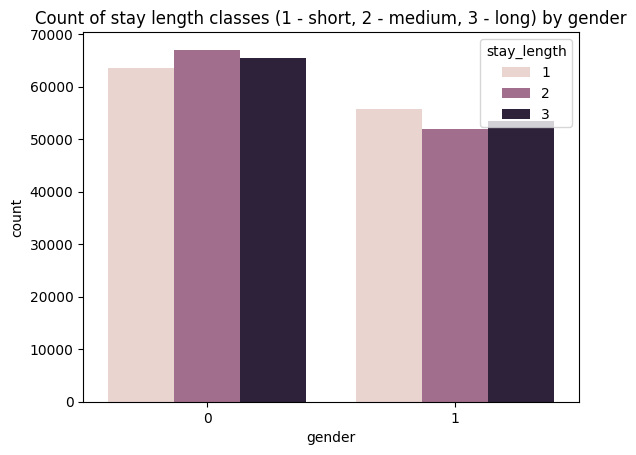

   temperature  heartrate  resprate  o2sat    sbp   dbp  acuity  pain_level  \
0         98.4       70.0      16.0   97.0  106.0  63.0       3           0   
1         98.9       88.0      18.0   97.0  116.0  88.0       3          10   
2         99.4      105.0      18.0   96.0  106.0  57.0       3          10   
3         97.8       87.0      14.0   97.0   71.0  43.0       2           7   
4         98.7       77.0      16.0   98.0   96.0  50.0       2           1   

   gender  ambulance  
0       0          1  
1       0          1  
2       0          1  
3       0          1  
4       0          1  
0    1
1    2
2    2
3    3
4    3
Name: stay_length, dtype: int64
(285720, 10)
(71431, 10)
OOB score:  0.4378447431051379
Test data score:  0.4361971692962439


'\n# Hyperparameter tuning for Random Forest with GridSearchCV\nrf = RandomForestClassifier(random_state=42, n_jobs=-1)\n\nparams = {\'max_depth\': [5, 10],\n\t\t  \'min_samples_leaf\': [100, 250, 500],\n\t\t  \'n_estimators\': [100, 200]}\n\nfrom sklearn.model_selection import GridSearchCV\n\n# Instantiating the grid search model (cv parameter defines k for k-fold cross-validation)\ngrid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4,\n                           n_jobs=-1, verbose=1, scoring=\'accuracy\')\n\ngrid_search.fit(X_train, y_train)\n\nprint(\'Best score from parameter grid search: \', grid_search.best_score_)\n\nrf_best = grid_search.best_estimator_\nprint(rf_best)\n\n# Visualizing trees\nfrom sklearn.tree import plot_tree\n\nplt.figure(figsize=(80,40))\nplot_tree(rf_best.estimators_[0], feature_names = X.columns, class_names=[\'Short\', \'Medium\', \'Long\'], filled=True)\n\nplt.figure(figsize=(80,40))\nplot_tree(rf_best.estimators_[1], feature_names = X.column

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Workspace/VSCode/data/edstays_final.csv')
print(df.head())
sns.countplot(x='gender', hue="stay_length", data=df)
plt.title('Count of stay length classes (1 - short, 2 - medium, 3 - long) by gender')
plt.show()

# Putting feature variable to X
X = df.drop(['OBJECTID', 'stay_id', 'stay_length'], axis=1)
# Putting response variable to y
y = df['stay_length']

# Print X/Y
print(X.head())
print(y.head())

# Now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape)
print(X_test.shape)

# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=30,
                                       min_samples_leaf=250, n_estimators=1000, oob_score=True)

classifier_rf.fit(X_train, y_train)

# Checking the oob score
print('OOB score: ', classifier_rf.oob_score_)

# Checking test data score
print('Test data score: ', classifier_rf.score(X_test, y_test))

# Hyperparameter tuning for Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {'max_depth': [5, 10],
		  'min_samples_leaf': [100, 250, 500],
		  'n_estimators': [100, 200]}

from sklearn.model_selection import GridSearchCV

# Instantiating the grid search model (cv parameter defines k for k-fold cross-validation)
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4,
                           n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best score from parameter grid search: ', grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

# Visualizing trees
from sklearn.tree import plot_tree

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[0], feature_names = X.columns, class_names=['Short', 'Medium', 'Long'], filled=True)

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[1], feature_names = X.columns, class_names=['Short', 'Medium', 'Long'], filled=True)

print('Feature importance: ', rf_best.feature_importances_)

imp_df = pd.DataFrame({"Variable": X_train.columns,
					   "Importance": rf_best.feature_importances_})
imp_df.sort_values(by="Importance", ascending=False)
print(imp_df)